<center><h1>Amount - Reach</h1></center>
<center><h3>Linear Regression</h3></center>

This is a basic code from compute the math equation who help me calculate with linear regression prediction model the reach expected based on amouont spent for Rock n Ribs restaurant Facebook campaigns. This notebook isn't a professional work, because this file only represent my way to think about how I can get the linear regression equation. If you want to look my final usefull script of this notebook yo could look on the folder of this file.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Data Preview

In [73]:
df = pd.read_csv('/Users/samantha/Desktop/Predicciones_RNR/RNR_Campañas-1-ene-2020-25-abr-2020.csv')
df.head()

,Inicio del informe,Fin del informe,Nombre de la campaña,Identificador de la campaña,Entrega de la campaña,Presupuesto del conjunto de anuncios,Tipo de presupuesto del conjunto de anuncios,Inicio,Finalización,Alcance,CTR (todos),CPC (todos) (MXN),CPM (costo por mil impresiones) (MXN),Importe gastado (MXN),Objetivo,Resultados,Indicador de resultado,Costo por resultados,Frecuencia
0,2020-01-01,2020-04-25,"Publicación: ""¡¡Muchas gracias a toda la banda...",23844135777830773,completed,13,Total,2020-01-16,2020-01-17,2647,8.464443,0.044312,3.750787,11.92,Interacción,225.0,actions:post_engagement,0.052978,1.200604
1,2020-01-01,2020-04-25,"Publicación: ""¡¡Participa y GANA1⃣0⃣0⃣0⃣ rocka...",23844135840410773,archived,312,Total,2020-01-16,2020-01-31,8,0.000000,0.000000,31.250000,0.25,Interacción,NaN,NaN,NaN,1.000000
2,2020-01-01,2020-04-25,"Publicación: ""¡Chela + alitas= felicidad!🤟😉🍗🍺""",23844136124270773,completed,385,Total,2020-01-16,2020-01-17,19944,3.175472,0.451178,14.327037,314.02,Interacción,340.0,actions:post_engagement,0.923588,1.098977
3,2020-01-01,2020-04-25,"Publicación: ""Arma tu combo con plato fuerte +...",23844136135630773,completed,130,Total,2020-01-16,2020-01-24,11683,4.064558,0.189781,7.713760,130.00,Interacción,190.0,actions:post_engagement,0.684211,1.442523
4,2020-01-01,2020-04-25,"Publicación: ""🔥¡Encuéntrala en todas nuestras ...",23844136188730773,completed,270,Total,2020-01-16,2020-01-31,1517,1.349287,4.479057,60.435336,237.39,Interacción,32.0,actions:post_engagement,7.418437,2.589321


In [74]:
df.columns

Index(['Inicio del informe', 'Fin del informe', 'Nombre de la campaña',
       'Identificador de la campaña', 'Entrega de la campaña',
       'Presupuesto del conjunto de anuncios',
       'Tipo de presupuesto del conjunto de anuncios', 'Inicio',
       'Finalización', 'Alcance', 'CTR (todos)', 'CPC (todos) (MXN)',
       'CPM (costo por mil impresiones) (MXN)', 'Importe gastado (MXN)',
       'Objetivo', 'Resultados', 'Indicador de resultado',
       'Costo por resultados', 'Frecuencia'],
      dtype='object')

In [98]:
amount_spent_arr = df['Importe gastado (MXN)']
reach_arr = df['Alcance']

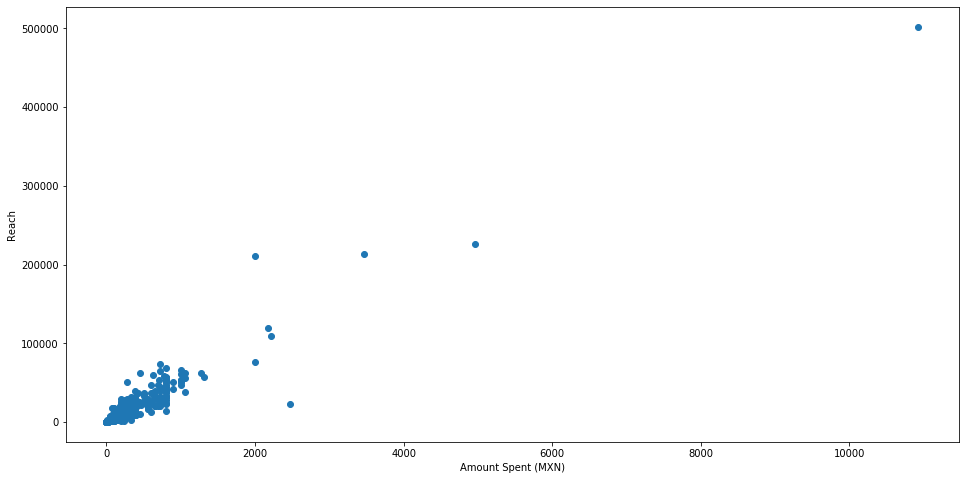

In [182]:
# Look our dataset on a data graph scatter
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(amount_spent_arr , reach_arr)
ax.set_xlabel('Amount Spent (MXN)')
ax.set_ylabel('Reach')
plt.show()

Look that! Our dataset has many outliers. So we can drop this data from our dataset.

In [79]:
a_r = zip(amount_spent_arr, reach_arr)
amount_spent_dict = set(a_r)
amount_spent_list = list(amount_spent_dict)
amount_spent_list

[(44.78, 1730),
 (179.5, 6098),
 (44.8, 1295),
 (725.0, 31784),
 (385.0, 9832),
 (87.71, 2997),
 (325.13, 10074),
 (53.31, 6002),
 (349.98, 18960),
 (200.0, 13144),
 (290.25, 7110),
 (112.0, 6558),
 (108.39, 12236),
 (100.0, 12708),
 (200.0, 6100),
 (320.65, 17516),
 (240.0, 15104),
 (281.95, 21460),
 (240.0, 17607),
 (74.67, 6146),
 (289.8, 18764),
 (78.83, 4100),
 (241.38, 12800),
 (241.38, 4171),
 (108.39, 14852),
 (257.77, 10112),
 (100.0, 6368),
 (224.0, 18752),
 (239.62, 11704),
 (29.99, 968),
 (99.96, 3584),
 (800.0, 33395),
 (74.67, 2936),
 (241.38, 8790),
 (1.93, 38),
 (805.48, 13980),
 (350.0, 26497),
 (105.77, 3931),
 (200.0, 14541),
 (44.8, 1390),
 (301.7, 16760),
 (1000.0, 53344),
 (106.08, 2677),
 (200.0, 8808),
 (631.78, 59840),
 (198.0, 10840),
 (800.0, 31856),
 (385.0, 14695),
 (200.0, 6929),
 (350.0, 20036),
 (161.1, 8864),
 (129.57, 7422),
 (545.53, 22209),
 (93.33, 4081),
 (106.13, 11140),
 (106.13, 10928),
 (899.96, 42433),
 (325.14, 15992),
 (130.0, 11683),
 (179.

In [88]:
# Calculate IQR based on axis = 0
Q1 = np.percentile(amount_spent_arr, q = 25)
Q3 = np.percentile(amount_spent_arr, q = 75)

IQR = Q3-Q1

bottom_lim = Q1-(1.5*IQR)
upper_lim = Q3+(1.5*IQR)

print(bottom_lim , upper_lim)

-185.0 591.0


In [92]:
amount_reach_list_clean = []
for i in range(0, len(amount_spent_list)-1):
    if amount_spent_list[i][0] < bottom_lim or amount_spent_list[i][0] > upper_lim:
        None
    else:
        amount_reach_list_clean.append(amount_spent_list[i])
amount_reach_list_clean

[(44.78, 1730),
 (179.5, 6098),
 (44.8, 1295),
 (385.0, 9832),
 (87.71, 2997),
 (325.13, 10074),
 (53.31, 6002),
 (349.98, 18960),
 (200.0, 13144),
 (290.25, 7110),
 (112.0, 6558),
 (108.39, 12236),
 (100.0, 12708),
 (200.0, 6100),
 (320.65, 17516),
 (240.0, 15104),
 (281.95, 21460),
 (240.0, 17607),
 (74.67, 6146),
 (289.8, 18764),
 (78.83, 4100),
 (241.38, 12800),
 (241.38, 4171),
 (108.39, 14852),
 (257.77, 10112),
 (100.0, 6368),
 (224.0, 18752),
 (239.62, 11704),
 (29.99, 968),
 (99.96, 3584),
 (74.67, 2936),
 (241.38, 8790),
 (1.93, 38),
 (350.0, 26497),
 (105.77, 3931),
 (200.0, 14541),
 (44.8, 1390),
 (301.7, 16760),
 (106.08, 2677),
 (200.0, 8808),
 (198.0, 10840),
 (385.0, 14695),
 (200.0, 6929),
 (350.0, 20036),
 (161.1, 8864),
 (129.57, 7422),
 (545.53, 22209),
 (93.33, 4081),
 (106.13, 11140),
 (106.13, 10928),
 (325.14, 15992),
 (130.0, 11683),
 (179.0, 4138),
 (236.08, 13948),
 (249.75, 13750),
 (281.95, 27209),
 (74.67, 3542),
 (106.13, 3874),
 (180.65, 11020),
 (385.0,

In [107]:
x_clean = []
y_clean = []

for i in range(0, len(amount_reach_list_clean)-1):
    x_clean.append(amount_reach_list_clean[i][0])
    y_clean.append(amount_reach_list_clean[i][1])
    
x_clean_arr = np.asarray(x_clean)
y_clean_arr = np.asarray(y_clean)

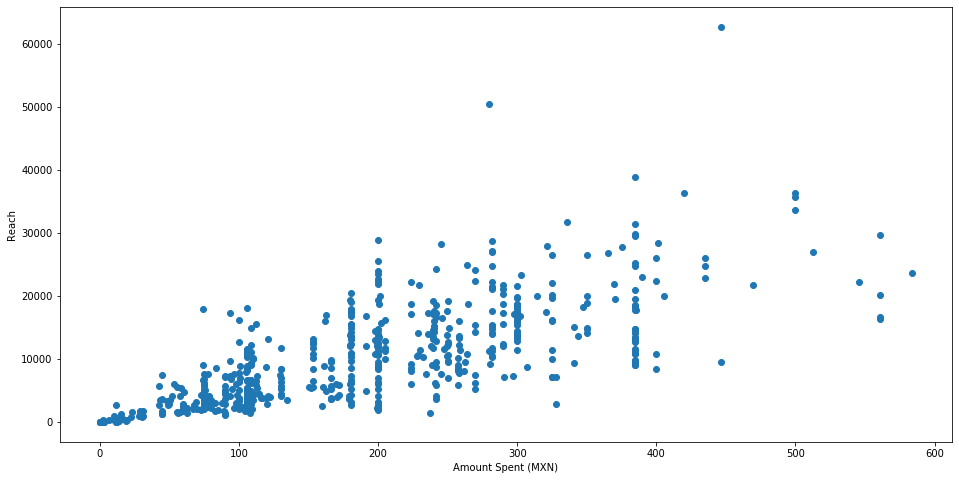

In [184]:
# Look our dataset on a data graph scatter
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(x_clean , y_clean)
ax.set_xlabel('Amount Spent (MXN)')
ax.set_ylabel('Reach')
plt.show()

Now our dataset is cleaner and has more objective data.

# Linear Regression

<img src = 'https://i.stack.imgur.com/OjlaY.png'> 

In [152]:
def estimate_m_b(x , y):
    n = np.size(x)
    
    # Calculate m formula summations
    m_x = np.mean(x)
    m_y = np.mean(y)
    
    # Calculate m and b
    sum_1 = np.sum((x-m_x)*(y-m_y))
    sum_2 = np.sum((x-m_x)**2)
    
    m = sum_1/sum_2
    b = m_y - (m*m_x)
                   
    return (m , b)

In [158]:
def plot_regression(x, y, m, b):
    
    fig, ax = plt.subplots(figsize=(16,8))
    ax.scatter(x , y)
    ax.set_xlabel('Amount Spent (MXN)')
    ax.set_ylabel('Reach')
    
    y_pred = (m*x) + b
    plt.plot(x, y_pred, color = 'r')
    
    # Labels
    plt.xlabel('Amount Spent(MXN)')
    plt.ylabel('Reach')
    
    plt.show()

Process was succesful. m = 50.21915057408033 , b = 816.6639036000179 

And your regression formula is y = 50.21915057408033x +816.6639036000179


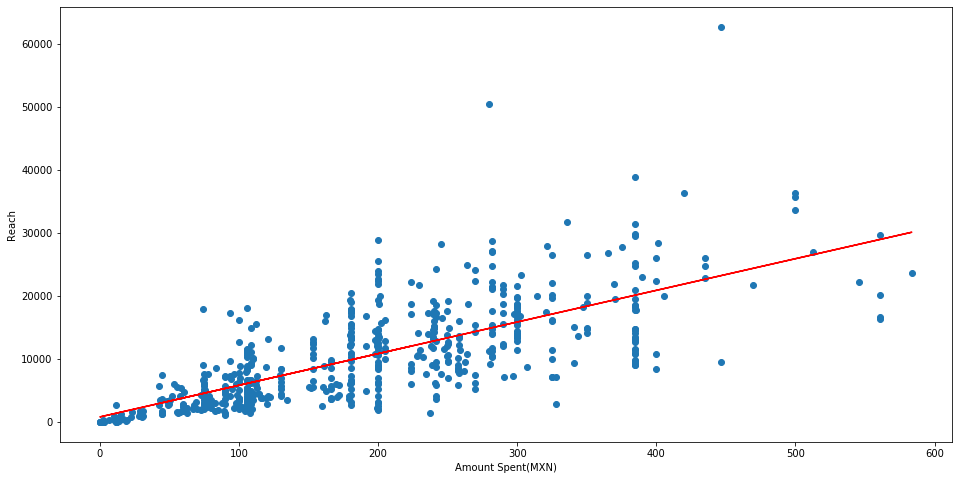

In [159]:
# Dataset
x = x_clean_arr
y = y_clean_arr
    
# Calculate m and b
r = estimate_m_b(x , y)
m = r[0]
b = r[1]
print(f'Process was succesful. m = {m} , b = {b} \n\nAnd your regression formula is y = {m}x +{b}')
    
# Show data and linear regression on scatter map
plot_regression(x, y, m, b)

# Prediction Model

What is the amount you want to invest in a promotion on Facebook? 500


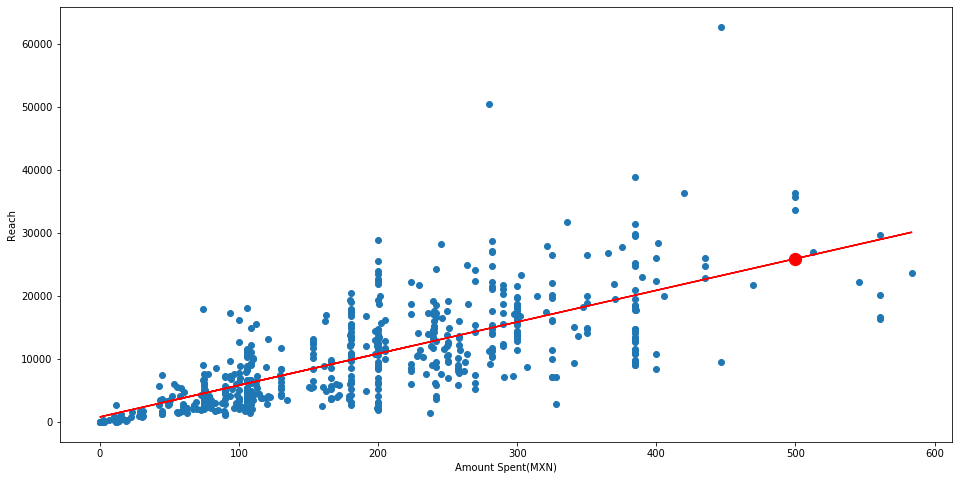

The reach you can probably obtain is: 25926 people reach


In [197]:
x_inv = int(input('What is the amount you want to invest in a promotion on Facebook? '))
y_ach = (m*x_inv) + b

plot_regression_pred(x, y, m, b, x_inv, y_ach)

print(f'The reach you can probably obtain is: {int(y_ach)} people reach')

In [196]:
def plot_regression_pred(x, y, m, b, x_inv, y_ach):

    fig, ax = plt.subplots(figsize=(16,8))
    ax.scatter(x , y)
    ax.set_xlabel('Amount Spent (MXN)')
    ax.set_ylabel('Reach')
    
    ax.scatter(x_inv , y_ach, marker = 'o', s=150, c='r')
    
    y_pred = (m*x) + b
    plt.plot(x, y_pred, color = 'r')
    
    # Labels
    plt.xlabel('Amount Spent(MXN)')
    plt.ylabel('Reach')
    
    plt.show()